In [1]:
# Using DLS method to analyse rotation data

In [70]:
# import necassary functions
from tools.dls import *
from matplotlib.ticker import ScalarFormatter

## Data Set
Choose a data set to calculate the DLS coefficients 

In [95]:
data_df = quick_read(11)
data_na = data_df.values  # data in narray datatype

# Perform DLS1
Use data read just above and a specified number for the subset rotation to demodulate.

In [96]:
%%time
subset_rot = 10
params_df = DLS1(data_na, subset_rot)

100% |########################################################################|


CPU times: user 38min 10s, sys: 376 ms, total: 38min 10s
Wall time: 38min 10s


### Writting parameters
write some parameters in .\Data\DLS1\ 

In [103]:
write_dict = {'time': t_m, 'beta_3': beta_3, 'beta_4': beta_4, 'sigma_3': sigma_beta_3, 'sigma_4': sigma_beta_4}
write_df = pd.DataFrame(write_dict)
write_df.to_csv('./Data/DLS1/DLS1_data.txt', index=False)

### DLS2: Calculate SME coefficients
As a function of different w_s.
Results are stored in *C*.

In [104]:
%%time

w_s = 2 * np.pi / (23*3600 + 56*60 + 4)  # sidereal frequency
w_s_list = list(np.arange(0.1, 10, 0.3))
N_w = len(w_s_list)
C = [None] * N_w  # store coefficient for each w_s


for i in range(N_w):
    C[i] = DLS2(params_df, w_s_list[i] * w_s, par=1)  # output a list contains two dictionary (one for the value of each coefficient, one for std)

CPU times: user 9.55 s, sys: 8 ms, total: 9.56 s
Wall time: 9.3 s


# Extracting Parameters and Coefficients

In [105]:
par_values_df = pd.DataFrame()
par_sigmas_df = pd.DataFrame()
co_values_df = pd.DataFrame()
co_sigmas_df = pd.DataFrame()

for i in range(N_w):
    co_value_df = pd.DataFrame(C[i][0], index=[str(i)])
    co_sigma_df = pd.DataFrame(C[i][1], index=[str(i)])
    par_value_df = pd.DataFrame(C[i][2], index=[str(i)])
    par_sigma_df = pd.DataFrame(C[i][3], index=[str(i)])
    
    co_values_df = pd.concat([co_values_df, co_value_df])
    co_sigmas_df = pd.concat([co_sigmas_df, co_sigma_df])
    par_values_df = pd.concat([par_values_df, par_value_df])
    par_sigmas_df = pd.concat([par_sigmas_df, par_sigma_df])

# create dataframe for w_s_list for I/O
w_s_list_df = pd.DataFrame({'w_s:': w_s_list})

## Writing 

In [106]:
pathname = './Data/DLS-w_s/'

co_value_filename = 'SME_coefficients_value.txt'
co_sigma_filename = 'SME_coefficients_sigma.txt'
par_value_filename = 'DLS2_parameters_value.txt'
par_sigma_filename = 'DLS2_parameters_sigma.txt'
w_s_list_filename = 'w_s_list.txt'

co_values_df.to_csv(pathname + co_value_filename, index_label='Index')
co_sigmas_df.to_csv(pathname + co_sigma_filename, index_label='Index')
par_values_df.to_csv(pathname + par_value_filename, index_label='Index')
par_sigmas_df.to_csv(pathname + par_sigma_filename, index_label='Index')

w_s_list_df.to_csv(pathname + w_s_list_filename, index_label='Index')

## Reading

In [107]:
pathname = './Data/DLS-w_s/'

co_value_filename = 'SME_coefficients_value.txt'
co_sigma_filename = 'SME_coefficients_sigma.txt'
par_value_filename = 'DLS2_parameters_value.txt'
par_sigma_filename = 'DLS2_parameters_sigma.txt'
w_s_list_filename = 'w_s_list.txt'

co_values_df = pd.read_csv(pathname + co_value_filename, index_col='Index')
co_sigmas_df = pd.read_csv(pathname + co_sigma_filename, index_col='Index')
par_values_df = pd.read_csv(pathname + par_value_filename, index_col='Index')
par_sigmas_df = pd.read_csv(pathname + par_sigma_filename, index_col='Index')
w_s_list_df = pd.read_csv(pathname + w_s_list_filename, index_col='Index')

w_s_list = w_s_list_df.values
N_w = len(w_s_list)

# Visualizing result
## Parameter index table
|Coefficient|$S_{C,0}$|$S_{S,\omega_s}$|$S_{C,\omega_s}$|$S_{S,2\omega_s}$|$S_{C,2\omega_s}$|$C_{C,0}$|$C_{S,\omega_s}$|$C_{C,\omega_s}$|$C_{S,2\omega_s}$|$C_{C,2\omega_s}$|
|:-:|
|*index*|0|1|2|3|4|5|6|7|8|9|


In [108]:
index = 8
par_dict = {'0': 'S_c_0', '1': 'S_s_ws','2': 'S_c_ws','3': 'S_s_2ws','4': 'S_c_2ws',
           '5': 'C_c_0', '6': 'C_s_ws','7': 'C_c_ws','8': 'C_s_2ws','9': 'C_c_2ws'}  # for selecting coefficient in another dictionary
par_index = par_dict[str(index)]
ylabel_dict = {'0': '$S_{c,0}$', '1': '$S_{s,\omega_s}$','2': '$S_{c,\omega_s}$','3': '$S_{s,2\omega_s}$','4': '$S_{c,2\omega_s}$',
           '5': '$C_{c,0}$', '6': '$C_{s,\omega_s}$','7': '$C_{c,\omega_s}$','8': '$C_{s,2\omega_s}$','9': '$C_{c,2\omega_s}$'}  # for displaying on y label
par_ylabel = ylabel_dict[str(index)]

par_value = par_values_df[par_index].values
par_sigma = par_sigmas_df[par_index].values

# Plotting Parameters

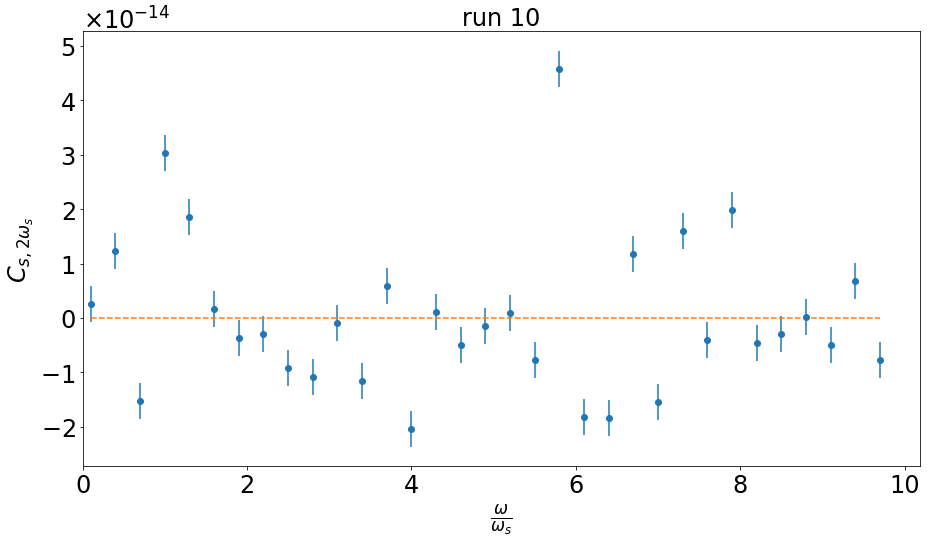

In [109]:
fig, ax = plt.subplots(figsize=(15,8))
ax.errorbar(w_s_list, par_value, yerr=par_sigma, fmt='o')
ax.plot(w_s_list, [0]*N_w, '--')  # add a zero line
ax.set_xlabel(r'$\frac{\omega}{\omega_s}$', fontsize=24)
ax.set_ylabel(par_ylabel, fontsize=24)
ax.tick_params(labelsize=24)
ax.set_xlim(left=0)
ax.set_title('run 10', fontsize=24)

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(24)

plt.show()

## Coefficient index table
|Coefficient|$c^T_Q$|$c^T_X$|$c^T_Y$|$c^T_Z$|$c^T_M$|$c^T_\_$|
|:-:|
|*index*|0|1|2|3|4|5|


In [88]:
index = 1
co_dict = {'0': 'c_T_Q', '1': 'c_T_X','2': 'c_T_Y','3': 'c_T_Z','4': 'c_T_M','5': 'c_T_u'}  # for selecting coefficient in another dictionary
co_index = co_dict[str(index)]
ylabel_dict = {'0': '$c^T_Q$', '1': '$c^T_X$','2': '$c^T_Y$','3': '$c^T_Z$','4': '$c^T_M$','5': '$c^T_\_$'}  # for displaying on y label
co_ylabel = ylabel_dict[str(index)]

co_value = co_values_df[co_index].values
co_sigma = co_sigmas_df[co_index].values

# Plotting

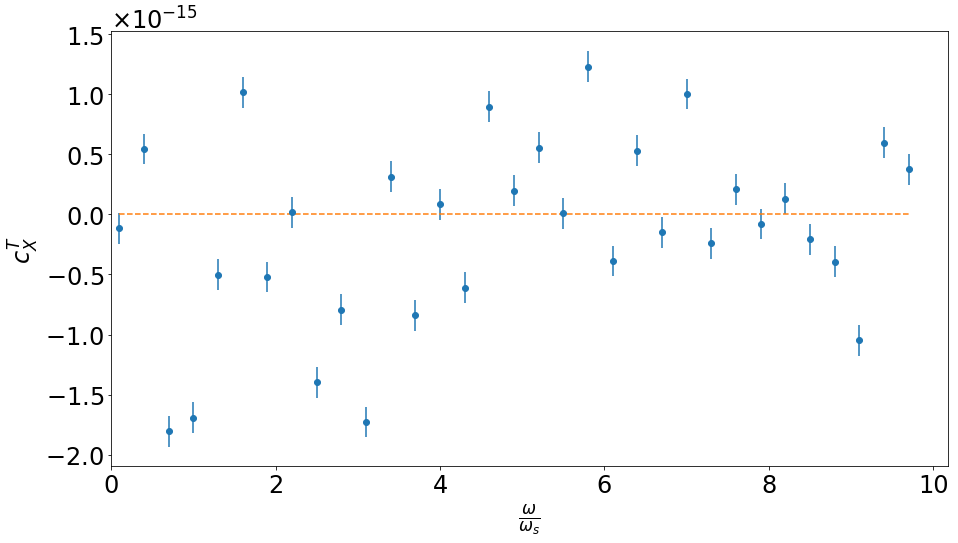

In [89]:
fig, ax = plt.subplots(figsize=(15,8))
ax.errorbar(w_s_list, co_value, yerr=co_sigma, fmt='o')
ax.plot(w_s_list, [0]*N_w, '--')  # add a zero line
ax.set_xlabel(r'$\frac{\omega}{\omega_s}$', fontsize=24)
ax.set_ylabel(co_ylabel, fontsize=24)
ax.tick_params(labelsize=24)
ax.set_xlim(left=0)

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(24)

plt.show()